In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys 
import scipy
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from scipy.io import arff
from sklearn.metrics import precision_score

import os
os.chdir("C:/Users/USER/Documents/my_DS_projects/SUPERVISED/classification/bankruptcy-prediction")
print("Current Directory:", os.getcwd())

Current Directory: C:\Users\USER\Documents\my_DS_projects\SUPERVISED\classification\bankruptcy-prediction


In [2]:
data = arff.loadarff("3year.csv")
df = pd.DataFrame(data[0])
print(df.shape)
df.head()

(10503, 65)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [3]:
# Inspect DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10503 non-null  float64
 1   Attr2   10503 non-null  float64
 2   Attr3   10503 non-null  float64
 3   Attr4   10485 non-null  float64
 4   Attr5   10478 non-null  float64
 5   Attr6   10503 non-null  float64
 6   Attr7   10503 non-null  float64
 7   Attr8   10489 non-null  float64
 8   Attr9   10500 non-null  float64
 9   Attr10  10503 non-null  float64
 10  Attr11  10503 non-null  float64
 11  Attr12  10485 non-null  float64
 12  Attr13  10460 non-null  float64
 13  Attr14  10503 non-null  float64
 14  Attr15  10495 non-null  float64
 15  Attr16  10489 non-null  float64
 16  Attr17  10489 non-null  float64
 17  Attr18  10503 non-null  float64
 18  Attr19  10460 non-null  float64
 19  Attr20  10460 non-null  float64
 20  Attr21  9696 non-null   float64
 21  Attr22  10503 non-null  float64
 22

We know all our features are numerical except our target feature and that we have missing data.

# Exploration

In [4]:
df['class'].value_counts()

b'0'    10008
b'1'      495
Name: class, dtype: int64

In [5]:
df['bankrupt'] = df['class'].str.decode('utf-8').astype(int).astype(bool)
df.drop(columns=['class'], inplace=True) 
df['bankrupt'].value_counts()

False    10008
True       495
Name: bankrupt, dtype: int64

It's a good idea to do some visualizations to see if there are any interesting trends or ideas we should keep in mind while we work. First, let's take a look at how many firms are bankrupt, and how many are not.

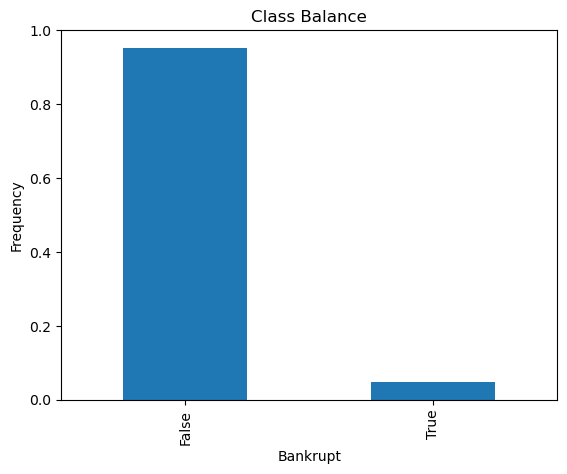

In [6]:
# Plot class balance
df['bankrupt'].value_counts(normalize = True).plot(

    kind = 'bar',
    xlabel = 'Bankrupt',
    ylabel = 'Frequency',
    title = 'Class Balance'
);

Since it looks like most of the companies in our dataset are doing all right for themselves, let's drill down a little farther. However, it also shows us that we have an imbalanced dataset, where our majority class is far bigger than our minority class. There is a clas imbalance

## Attr27

In [7]:
# Summary statistics for `Attr_27`
df['Attr27'].describe().apply('{0:,.0f}'.format)

count        9,788
mean         1,186
std         34,691
min       -190,130
25%              0
50%              1
75%              5
max      2,723,000
Name: Attr27, dtype: object

### Visualize Skewness

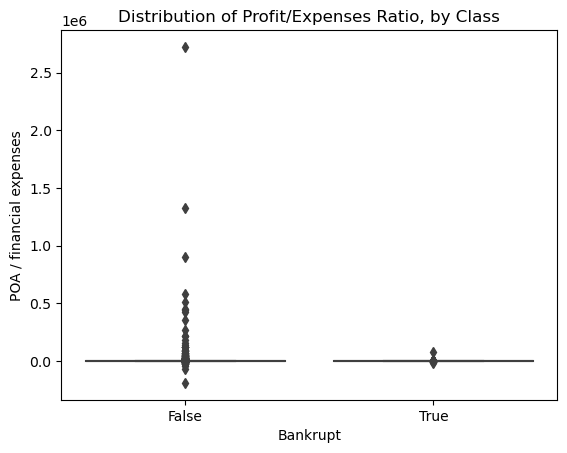

In [8]:
# Create boxplot
sns.boxplot(x = 'bankrupt', y = 'Attr27', data = df)
plt.xlabel("Bankrupt")
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

Note that the median is around 1, but the mean is over 1000. That suggests that this feature is skewed to the right. Let's make a histogram to see what the distribution actually looks like.

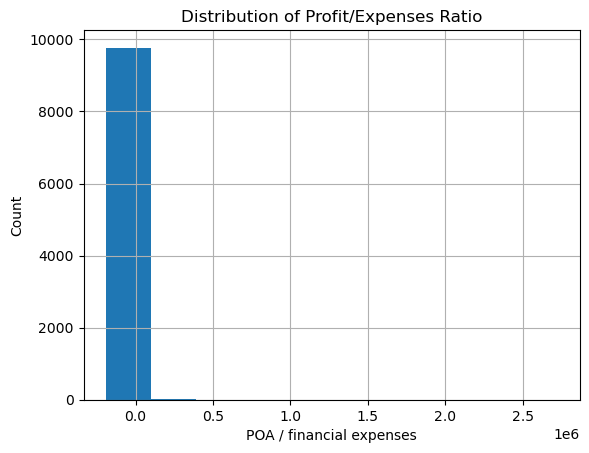

In [9]:
# Plot histogram of `Attr_27`
df['Attr27'].hist()
plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

We saw it in the numbers and now we see it in the histogram. The data is very skewed. So, in order to create a helpful boxplot, we need to trim the data.

### Addressing Skewness

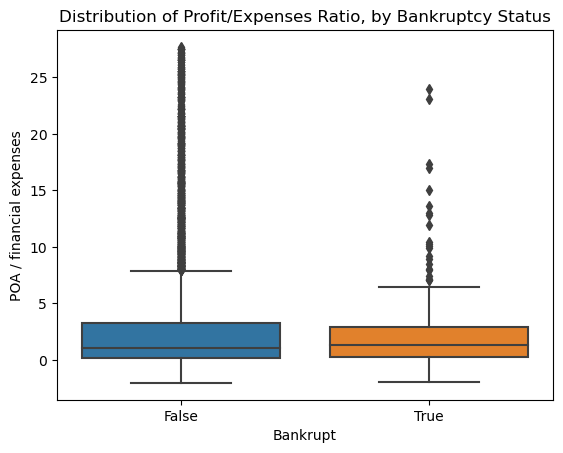

In [10]:
# Create clipped boxplot
q1, q9 = df['Attr27'].quantile([0.1,0.9])
mask = df['Attr27'].between(q1, q9)
sns.boxplot(x = 'bankrupt', y = 'Attr27', data = df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status");

## Attr31

In [11]:
# Explore another feature
# Summary statistics for `Attr_31`
df['Attr31'].describe().apply('{0:,.0f}'.format)

count    10,460
mean         -0
std          11
min        -771
25%           0
50%           0
75%           0
max          60
Name: Attr31, dtype: object

### Visualize Skewness

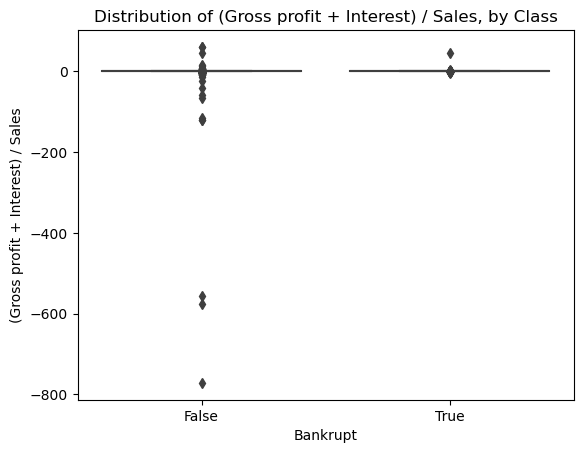

In [12]:
# Create boxplot
sns.boxplot(x = 'bankrupt', y = 'Attr31', data = df)
plt.xlabel("Bankrupt")
plt.ylabel("(Gross profit + Interest) / Sales")
plt.title("Distribution of (Gross profit + Interest) / Sales, by Class");

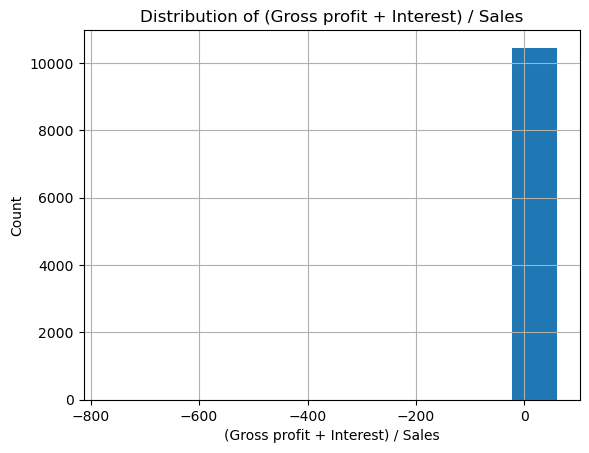

In [13]:
# Plot histogram of `feat_31`
df['Attr31'].hist()
plt.xlabel("(Gross profit + Interest) / Sales")
plt.ylabel("Count"),
plt.title("Distribution of (Gross profit + Interest) / Sales");

### Addressing skewness

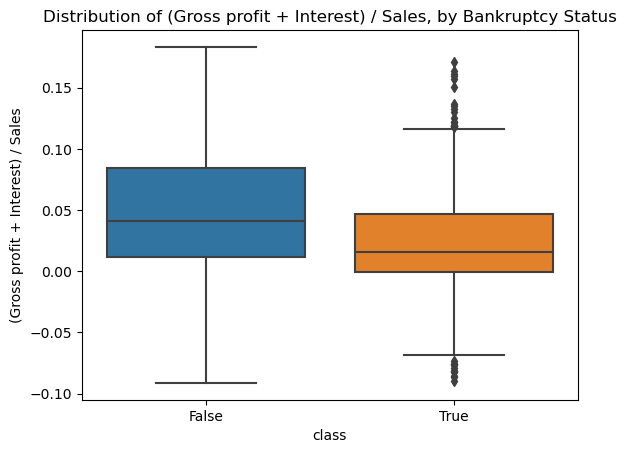

In [14]:
q1, q9 = df['Attr31'].quantile([0.1, 0.9])
mask = df['Attr31'].between(q1, q9)

sns.boxplot(x = 'bankrupt', y = 'Attr31', data = df[mask])
plt.xlabel("class")
plt.ylabel("(Gross profit + Interest) / Sales")
plt.title("Distribution of (Gross profit + Interest) / Sales, by Bankruptcy Status");

- Looking at other features, we can see that they're skewed, too. This will be important to keep in mind when we decide what type of model we want to use.

- Another important consideration for model selection is whether there are any issues with multicollinearity in our model. Let's check.

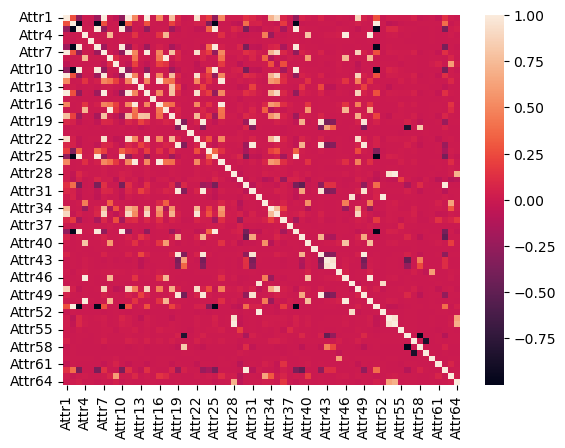

In [15]:
corr = df.drop(columns = 'bankrupt').corr()
sns.heatmap(corr);

## Split

In [16]:
target = "bankrupt"
X = df.drop(columns = target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (10503, 64)
y shape: (10503,)


### Resample
Now that we've split our data into training and validation sets, we can address the class imbalance we saw during our EDA. One strategy is to resample the training data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

under_sampler = RandomUnderSampler(random_state = 42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()


over_sampler = RandomOverSampler(random_state = 42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

X_train shape: (8402, 64)
y_train shape: (8402,)
X_test shape: (2101, 64)
y_test shape: (2101,)
(776, 64)
(16028, 64)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.013739,0.48424,0.335830,3.28400,28.116,0.00000,0.017206,1.0651,1.36290,0.51576,...,5550.80,0.014543,0.026638,0.98749,0.000000,5.8807,5.7658,39.379,9.2689,2.6354
1,0.055586,0.28747,0.340460,2.21220,41.783,0.15219,0.065999,2.1786,0.92951,0.62626,...,5034.80,-0.075836,0.088758,1.07580,0.010533,11.7840,5.4632,62.549,5.8354,4.3283
2,0.125190,0.21204,-0.043561,0.76704,-26.932,0.42740,0.155220,3.7142,1.17620,0.78757,...,-5127.20,0.149790,0.158960,0.85021,0.031808,68.9750,10.7120,63.477,5.7501,1.2553
3,0.271490,0.34761,0.419280,2.24250,300.000,0.12908,0.303200,1.8768,8.68160,0.65239,...,1322.00,0.038724,0.416140,0.98078,0.000000,147.9600,149.5800,14.188,25.7270,35.6880
4,0.485420,0.38138,0.618620,2.62200,372.120,0.00000,0.596450,1.6220,2.96690,0.61862,...,490.72,0.200640,0.784690,0.81596,0.000000,NaN,4.2876,46.919,7.7793,NaN


# Build Decision Tree Model

## Baseline

In [19]:
acc_baseline = y_train.value_counts(normalize = True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9538


### Iterate

From the 3 models above the Random Forest performs better. Therefore we will be moving ahead with it.

In [20]:
# Fit on `X_train`, `y_train`
model_reg = make_pipeline(
    SimpleImputer(strategy = 'median'),
    DecisionTreeClassifier(random_state = 42)
)
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(
    SimpleImputer(strategy = 'median'),
    DecisionTreeClassifier(random_state = 42)
)
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(
    SimpleImputer(strategy = 'median'),
    DecisionTreeClassifier(random_state = 42)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

### Evaluate

In [21]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9257
Training Accuracy: 0.7009
Test Accuracy: 0.6859
Training Accuracy: 1.0
Test Accuracy: 0.9453


Over sampler is the best 

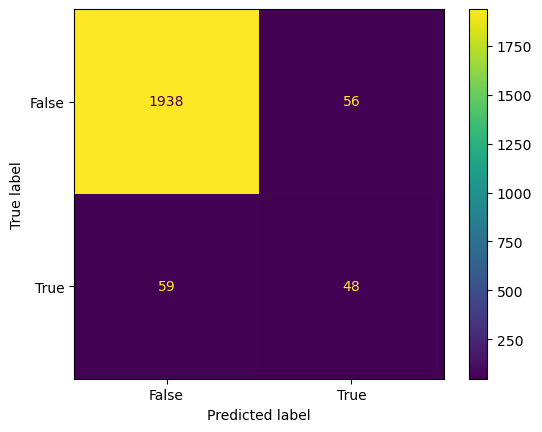

In [22]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test);

In [23]:
depth = model_over.named_steps['decisiontreeclassifier'].get_depth()
print(depth)

36


In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    "Decision Tree": make_pipeline(SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42)),
    "Random Forest": make_pipeline(SimpleImputer(strategy="median"), RandomForestClassifier(class_weight="balanced", random_state=42)),
    "Gradient Boosting": make_pipeline(SimpleImputer(strategy="median"), GradientBoostingClassifier(n_estimators=50, max_depth=4))
}

from sklearn.metrics import classification_report

for name, model in models.items():
    model.fit(X_train_over, y_train_over)
    y_pred = model.predict(X_test)
    
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))



Decision Tree Performance:
              precision    recall  f1-score   support

       False       0.97      0.97      0.97      1994
        True       0.46      0.45      0.45       107

    accuracy                           0.95      2101
   macro avg       0.72      0.71      0.71      2101
weighted avg       0.94      0.95      0.94      2101


Random Forest Performance:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98      1994
        True       0.79      0.18      0.29       107

    accuracy                           0.96      2101
   macro avg       0.87      0.59      0.63      2101
weighted avg       0.95      0.96      0.94      2101


Gradient Boosting Performance:
              precision    recall  f1-score   support

       False       0.98      0.92      0.95      1994
        True       0.33      0.73      0.46       107

    accuracy                           0.91      2101
   macro avg       0.66      0.83      0

## **Key Observations**

| Model              | Precision (Minority) | Recall (Minority) | F1-Score (Minority) | Accuracy |
|--------------------|---------------------|-------------------|---------------------|----------|
| Decision Tree     | 0.46                | 0.45              | 0.45                | 0.95     |
| Random Forest     | 0.79                | 0.18              | 0.29                | 0.96     |
| Gradient Boosting | 0.33                | 0.73              | 0.46                | 0.91     |

## **Interpretation**

### **Decision Tree**
- Performs better than Random Forest in recall (**0.45 vs. 0.18**), meaning it captures more bankrupt companies.  
- However, it has a **low precision (0.46)**, meaning it misclassifies many non-bankrupt companies as bankrupt.  

### **Random Forest (with class_weight="balanced")**
- Has **high precision (0.79)** but **very low recall (0.18)**, meaning it predicts bankrupt companies very selectively.  
- This suggests it fails to identify many actual bankrupt companies.  

### **Gradient Boosting (n_estimators=50, max_depth=4)**
- Has the **highest recall (0.73)** for bankrupt companies, meaning it identifies most of them correctly.  
- However, **precision is low (0.33)**, meaning it predicts many non-bankrupt companies as bankrupt.  
- **Best F1-score (0.46)** among the three, indicating the best trade-off between precision and recall.

In [ ]:
# Extract best hyperparameters
model_rf.best_params_

{'randomforestclassifier__max_depth': 30,
 'randomforestclassifier__n_estimators': 50}

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Define a pipeline with an imputer and Random Forest
rf_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # Fill NaNs with median values
    ("rf", RandomForestClassifier(random_state=42))
])

# Define hyperparameter grid
param_grid = {
    "rf__n_estimators": [150, 200, 250],  # Number of trees
    "rf__max_depth": [10, 15, 20],          # Tree depth
    "rf__min_samples_split": [2, 5],   # Minimum samples to split
    "rf__min_samples_leaf": [1, 2],     # Minimum samples per leaf
    "rf__class_weight": ["balanced"]  # Handling class imbalance
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring="f1", n_jobs=-1, verbose=2)
grid_search.fit(X_train_over, y_train_over)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
print("Fine-Tuned Random Forest Performance:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'rf__class_weight': 'balanced', 'rf__max_depth': 20, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 250}
Fine-Tuned Random Forest Performance:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98      1994
        True       0.81      0.20      0.32       107

    accuracy                           0.96      2101
   macro avg       0.88      0.60      0.65      2101
weighted avg       0.95      0.96      0.94      2101



In [ ]:
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]
y_pred_adjusted = y_pred_proba > 0.5  # Lowering threshold to capture more positives
print(classification_report(y_test, y_pred_adjusted))

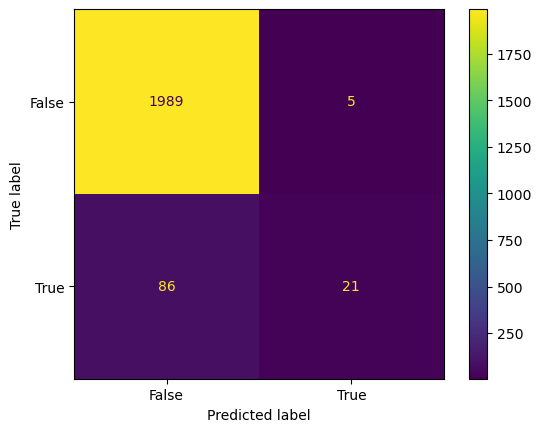

In [27]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test);

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)

def make_cnf_matrix(threshold):
    
    threshold = 0.2
    y_pred_proba = best_rf.predict_proba(X_test)[:, -1]
    y_pred = y_pred_proba > threshold
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravle()
    print(f'Profit: €{tp * 100_000_000}')
    print(f'Losses: €{fp * 250_000_000}')
    CocnfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar = False)


thresh_widget = widgets.FloatSlider(min = 0, max = 1, value= 0.5, step = 0.05)

interact(make_cnf_matrix, threshold=thresh_widget);

### Save model

In [ ]:
def make_predictions(data_filepath, model_filepath):
    # Wrangle JSON file
    X_test = wrangle(data_filepath)
    # Load model
    with open(model_filepath, 'rb') as f:
        model = pickle.load(f)
    # Generate predictions
    y_test_pred = model.predict(X_test)
    # Put predictions into Series with name "bankrupt", and same index as X_test
    y_test_pred = pd_Series(y_test_pred, index = X_test.index, name = 'bankrupt')
    return y_test_pred

In [ ]:
y_test_pred = make_predictions(
    data_filepath="data/poland-bankruptcy-data-2009-mvp-features.json.gz",
    model_filepath="model-5-3.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

In [ ]:
# Save your model as `"model-5-2.pkl"`
with open('best_rf.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

### Load model

In [ ]:
# Load `"model-5-2.pkl"`
with open('model_rf.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
print(loaded_model)
